In [1]:
from keras.utils import to_categorical
from keras import layers, models, optimizers ,Model
from keras.layers import Input 
def load_mnist():
    # the data, shuffled and split between train and test sets
    from keras.datasets import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
    x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.
    y_train = to_categorical(y_train.astype('float32'))
    y_test = to_categorical(y_test.astype('float32'))
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = load_mnist()

Using TensorFlow backend.
/home/yiwen/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from keras import backend as K
from keras.layers import Activation 
from keras.utils.generic_utils import get_custom_objects
def swish(x):
    return K.sigmoid(x)*x
get_custom_objects().update({'swish': Activation(swish )})

In [31]:
from IPython.display import display, Image
from PIL import Image as PIL_Image
from io import BytesIO
import numpy as np
from IPython.display import display, Image

def display_img_array(ima, **kwargs):
    if ima.dtype == np.float32 or ima.dtype == np.float64:
        ima = (np.clip(ima, 0., 1.)*255).astype(np.uint8)
    im = PIL_Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png', **kwargs))

In [56]:
IMG_C, IMG_W, IMG_H=1,56,56
def show(x):
    x = x.reshape(-1, IMG_C, IMG_H, IMG_W)
    w = min(x.shape[0]*100, 800)
    x = x.swapaxes(0, 1).swapaxes(1,2)
    if IMG_C == 1:
        img = x.reshape(IMG_H, -1)
    else:
        x = x.reshape(IMG_C, IMG_H, -1)
        img = np.swapaxes(x, 0, 1)
        img = np.swapaxes(img, 1, 2)
    display_img_array(img, width=w) 

In [84]:
Big=models.Sequential()
Big.add(layers.convolutional.Conv2DTranspose(input_shape=(28, 28, 1),filters=128,kernel_size=(8,8),activation='relu'))
Big.add(layers.Dropout(0.3))
Big.add(layers.convolutional.Conv2DTranspose(filters=128,kernel_size=(8,8),activation='swish'))
Big.add(layers.Dropout(0.3))
Big.add(layers.convolutional.Conv2DTranspose(filters=64,kernel_size=(8,8),activation='swish'))
Big.add(layers.Dropout(0.3))
Big.add(layers.convolutional.Conv2DTranspose(filters=1,kernel_size=(8,8),activation='relu'))
Big.add(layers.Dropout(0.3))
Big.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
Big.add(layers.Conv2D(filters=1,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
Big.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_59 (Conv2DT (None, 35, 35, 128)       8320      
_________________________________________________________________
dropout_63 (Dropout)         (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_transpose_60 (Conv2DT (None, 42, 42, 128)       1048704   
_________________________________________________________________
dropout_64 (Dropout)         (None, 42, 42, 128)       0         
_________________________________________________________________
conv2d_transpose_61 (Conv2DT (None, 49, 49, 64)        524352    
_________________________________________________________________
dropout_65 (Dropout)         (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_transpose_62 (Conv2DT (None, 56, 56, 1)         4097      
__________

In [89]:
Big.compile(optimizer='Adam', loss='mse')
Big.fit(x_train, x_train,
                epochs=30,
                batch_size=150,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0115 - val_loss: 0.0096
Epoch 2/30
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 3/30
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0076 - val_loss: 0.0068
Epoch 4/30
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0069 - val_loss: 0.0077
Epoch 5/30
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0064 - val_loss: 0.0090
Epoch 6/30
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 7/30
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0058 - val_loss: 0.0089
Epoch 8/30
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0056 - val_loss: 0.0088
Epoch 9/30
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0055 - val_loss: 0.0

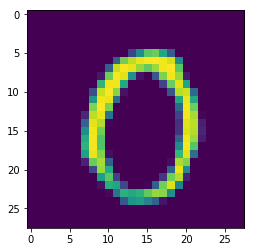

In [90]:
x_recon = Big.predict(x_test, batch_size=20)
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
reco=x_recon[13,:,:]*255
reco=numpy.reshape(reco,(28,28))
plt.imshow(reco)

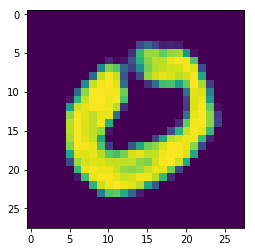

In [91]:
reco=x_recon[25,:,:]*255
reco=numpy.reshape(reco,(28,28))
plt.imshow(reco)

In [92]:
encoded_input = Input(shape=(28,28,1,))
bigger = Big.layers[0](encoded_input)
bigger = Big.layers[1](bigger)
bigger = Big.layers[2](bigger)
bigger = Big.layers[3](bigger)
bigger = Big.layers[4](bigger)
bigger = Big.layers[5](bigger)
bigger = Big.layers[6](bigger)
Bigger = Model(encoded_input, bigger)
Bigger.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_transpose_59 (Conv2DT (None, 35, 35, 128)       8320      
_________________________________________________________________
dropout_63 (Dropout)         (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_transpose_60 (Conv2DT (None, 42, 42, 128)       1048704   
_________________________________________________________________
dropout_64 (Dropout)         (None, 42, 42, 128)       0         
_________________________________________________________________
conv2d_transpose_61 (Conv2DT (None, 49, 49, 64)        524352    
_________________________________________________________________
dropout_65 (Dropout)         (None, 49, 49, 64)        0         
__________

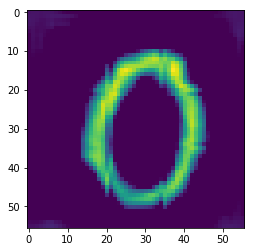

In [93]:
x_recon = Bigger.predict(x_test, batch_size=20)
x_recon.shape
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
reco=x_recon[13,:,:]
reco=numpy.reshape(reco,(56,56))
plt.imshow(reco)

In [1]:
x_recon = Bigger.predict(x_test[1:50])
show(x_recon)

NameError: name 'Bigger' is not defined